[*********************100%***********************]  6 of 6 completed
<ipython-input-1-36cacf733fc3>:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns[ticker] = stock_data[ticker]['Adj Close'].pct_change()


Max Sharpe Ratio: 1.4407417589645772
Return: 62.28174348223817%
Volatility: 43.228943073738904%
Optimal Weights (as percentages): {'V': '7.28%', 'MA': '4.47%', 'MST': '8.76%', 'ADBE': '3.18%', 'TSM': '2.50%', 'NVDA': '73.81%'}


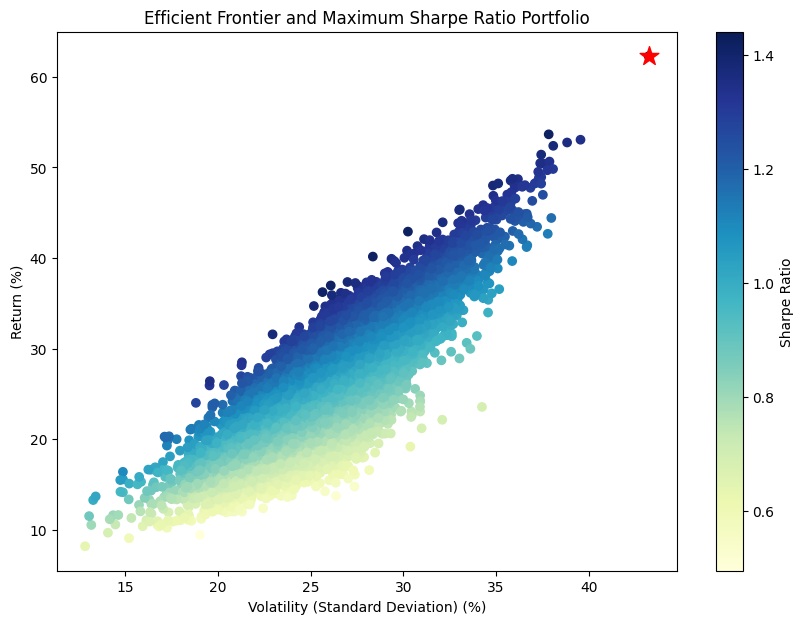

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of stocks
tickers = ['V', 'MA', 'MST', 'ADBE', 'TSM', 'NVDA']

# Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-11-22", group_by='ticker')

# Calculate daily returns
daily_returns = pd.DataFrame()
for ticker in tickers:
    daily_returns[ticker] = stock_data[ticker]['Adj Close'].pct_change()

# Calculate annualized mean returns (assuming 252 trading days in a year)
mean_returns = daily_returns.mean() * 252

# Calculate the covariance matrix (annualized)
cov_matrix = daily_returns.cov() * 252

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weight_array = []

# Risk-free rate (assuming 0 for simplicity)
risk_free_rate = 0.0

# Initialize random portfolios
for i in range(num_portfolios):
    # Random allocation to stocks (must sum to 1)
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weight_array.append(weights)

    # Expected portfolio return (convert to percentage)
    portfolio_return = np.sum(weights * mean_returns) * 100

    # Expected portfolio variance and standard deviation (convert to percentage)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * 100

    # Sharpe ratio (risk-adjusted return)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std

    # Save the results: portfolio return, volatility, Sharpe ratio
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

# Locate the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_portfolio = results[:, max_sharpe_idx]
optimal_weights = weight_array[max_sharpe_idx]

# Convert optimal weights to percentages with 2 decimal places
optimal_weights_percentage = [f"{weight * 100:.2f}%" for weight in optimal_weights]

# Print the optimal weights as a list with percentages
print(f"Max Sharpe Ratio: {max_sharpe_portfolio[2]}")
print(f"Return: {max_sharpe_portfolio[0]}%")
print(f"Volatility: {max_sharpe_portfolio[1]}%")
print(f"Optimal Weights (as percentages): {dict(zip(tickers, optimal_weights_percentage))}")

# Plotting the efficient frontier
plt.figure(figsize=(10, 7))

# Scatter plot for portfolios
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the max Sharpe ratio
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], c='red', marker='*', s=200)

plt.title('Efficient Frontier and Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Standard Deviation) (%)')
plt.ylabel('Return (%)')

plt.show()
